<a href="https://colab.research.google.com/github/sidharth178/AutoML/blob/master/H20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><b> H2O - AutoML</h1>


- H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability.
- H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.
- H2O only supports Java SE Runtime Environment Versions 8–11

### **H2O AutoML functionalities**
H2O’s AutoML is equipped with the following functionalities:

- Necessary data pre-processing capabilities( as in all H2O algorithms ).
- Trains a Random grid of algorithms like GBMs, DNNs, GLMs, etc. using a carefully chosen hyper-parameter space.
- Individual models are tuned using cross-validation.
- Two Stacked Ensembles are trained. One ensemble contains all the models (optimized for model performance), and the other ensemble provides just the best performing model from each algorithm class/family (optimized for production use).
- Returns a sorted “Leaderboard” of all models.
- All models can be easily exported to production.

### **Context**
  1. **Important Optimal Parameters**
  2. **Install H2O**
  3. **Start H2O**
  4. **Loading data into H2O**
  5. **Split the dataset**
  6. **H2O Model Building**
  7. **Train H2O Model**
  8. **Show H20 Leaderboard**
  9. **Get Best Model**
  10. **Find Prediction**
  11. **Show Model Performance**
  12. **Show All Trained Model**
  13. **Train Model Uning a Specific Algo**
  14. **Retrive Model Performance**
  15. **Show Variable Importance Plot**



### **1. Important Optional Parameters**

**max_runtime_secs:**[0] This specifies the maximum time that the AutoML process will run for. The default is 0 (no limit)

**max_models:**[NULL] Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models.

**max_runtime_secs_per_model:**[0] Specify the max amount of time dedicated to the training of each individual model.

**stopping_metric:**[auto] Specify the metric to use for early stopping. Defaults to AUTO. The available options are:
AUTO: This defaults to logloss for classification and deviance for regression. Ex:[ deviance (mean residual deviance), logloss, MSE, RMSE, MAE, RMSLE, AUC (area under the ROC curve), AUCPR (area under the Precision-Recall curve), lift_top_group, misclassification, mean_per_class_error ]

**sort_metric:** Specifies the metric used to sort the Leaderboard by at the end of an AutoML run. Available options include:
AUTO: This defaults to AUC for binary classification, mean_per_class_error for multinomial classification, and deviance for regression. Ex:[ deviance (mean residual deviance), logloss, MSE, RMSE, MAE, RMSLE, AUC (area under the ROC curve), AUCPR (area under the Precision-Recall curve), mean_per_class_error ]

**exclude_algos:** A list/vector of character strings naming the algorithms to skip during the model-building phase.

**include_algos:** A list/vector of character strings naming the algorithms to include during the model-building phase.

**nfolds:** Number of folds to be used for cross validation. For more on this, check out the H2O explanation of cross validation.

**balance_classes:**[False] When we have a class imbalance in our target feature, we may want to resample our data, either by over-sampling the minority class or under-sampling the majority class when creating the new distribution.

**ignored_columns:** To ignore a column

### **2. Install H2O**

In [1]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 22 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=4fd7ecf60ae160f36795828b9da6fdfee1812b188a1e880105924efd9ebd0106
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


### **3. Start H2O**

In [2]:
# initializing a local H2O cluster
import h2o
from h2o.automl import H2OAutoML
h2o.init() # It'll makes sure that no prior instance of H2O is running

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7n47thu6
  JVM stdout: /tmp/tmp7n47thu6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7n47thu6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_zedsg2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### **4. Loading data into H2O**

In [3]:
data_path = "/content/churn_data_st.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.5,No
3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
7795-CFOCW,Male,0,45,4,One year,No,42.3,1840.75,No
9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.7,151.65,Yes
9305-CDSKC,Female,0,8,6,Month-to-month,Yes,99.65,820.5,Yes
1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.1,1949.4,No
6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.9,No
7892-POOKP,Female,0,28,7,Month-to-month,Yes,104.8,3046.05,Yes
6388-TABGU,Male,0,62,4,One year,No,56.15,3487.95,No


### **5. Split the dataset**

In [4]:
train, test, valid = df.split_frame(ratios=[0.7, 0.15], seed=1)

In [5]:
y = "Churn"
x = df.columns
x.remove(y)
x.remove("customerID")

### **6. H2O Model Building**

In [6]:
h2o_model = H2OAutoML(max_models = 10,
                      seed = 10,
                      exclude_algos = ["StackedEnsemble", "DeepLearning"],
                      verbosity="info",
                      nfolds=0,
                      max_runtime_secs=120,
                      # max_runtime_secs_per_model=30,
                      stopping_metric = 'rmse',
                      sort_metric = 'rmse',
                      balance_classes = True
                      )

### **7. Train H2O Model**

In [7]:
h2o_model.train(x = x, y = y, training_frame = train, validation_frame = valid)

AutoML progress: |
15:23:26.855: Project: AutoML_1_20211114_152326
15:23:26.856: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:23:26.864: Setting stopping tolerance adaptively based on the training frame: 0.014219127353430849
15:23:26.865: Build control seed: 10
15:23:26.866: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
15:23:26.937: training frame: Frame key: AutoML_1_20211114_152326_training_py_3_sid_bf21    cols: 10    rows: 4467  chunks: 8    size: 172858  checksum: -4432760674848075498
15:23:26.938: validation frame: Frame key: py_5_sid_bf21    cols: 10    rows: 1067  chunks: 8    size: 45155  checksum: -6380701859518444760
15:23:26.941: leaderboard frame: Frame key: AutoML_1_20211114_152326_leaderboard_py_3_sid_bf21    cols: 10    rows: 479  chunks: 8    size: 35286  checksum: 8773663619283614381
15:23:26.942: blending frame: NULL
15:2

,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11133195820860814
RMSE: 0.3336644395326061
LogLoss: 0.34625350893801693
Mean Per-Class Error: 0.18452457278767354
AUC: 0.8994898011943848
AUCPR: 0.7645364251698769
Gini: 0.7989796023887696

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37355014085769656: 


,,No,Yes,Error,Rate
0,No,2803.0,489.0,0.1485,(489.0/3292.0)
1,Yes,285.0,890.0,0.2426,(285.0/1175.0)
2,Total,3088.0,1379.0,0.1733,(774.0/4467.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.373550,0.696946,202.0
1,max f2,0.169555,0.798156,291.0
2,max f0point5,0.496359,0.718670,152.0
3,max accuracy,0.496359,0.845086,152.0
4,max precision,0.961415,1.000000,0.0
5,max recall,0.010989,1.000000,387.0
6,max specificity,0.961415,1.000000,0.0
7,max absolute_mcc,0.463329,0.585210,166.0
8,max min_per_class_accuracy,0.321204,0.808323,224.0
9,max mean_per_class_accuracy,0.294099,0.815475,235.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 26.24 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010074,0.909985,3.717220,3.717220,0.977778,0.933290,0.977778,0.933290,0.037447,0.037447,271.721986,271.721986,0.037143
1,2,0.020372,0.873553,3.553765,3.634594,0.934783,0.893587,0.956044,0.913220,0.036596,0.074043,255.376503,263.459434,0.072827
2,3,0.029998,0.840112,3.713290,3.659848,0.976744,0.858049,0.962687,0.895516,0.035745,0.109787,271.329045,265.984757,0.108268
3,4,0.040072,0.811351,3.463773,3.610555,0.911111,0.826173,0.949721,0.878083,0.034894,0.144681,246.377305,261.055509,0.141947
4,5,0.050146,0.786985,3.125844,3.513180,0.822222,0.799521,0.924107,0.862301,0.031489,0.176170,212.584397,251.318009,0.171006
5,6,0.100067,0.684817,3.017495,3.265892,0.793722,0.737285,0.859060,0.799933,0.150638,0.326809,201.749451,226.589176,0.307671
6,7,0.149989,0.592277,2.642439,3.058384,0.695067,0.635696,0.804478,0.745269,0.131915,0.458723,164.243870,205.838425,0.418930
7,8,0.200358,0.517372,2.399296,2.892692,0.631111,0.552632,0.760894,0.696841,0.120851,0.579574,139.929645,189.269179,0.514568
8,9,0.299978,0.385510,1.631742,2.473943,0.429213,0.448758,0.650746,0.614455,0.162553,0.742128,63.174181,147.394347,0.599965
9,10,0.400045,0.270227,1.165175,2.146568,0.306488,0.326354,0.564633,0.542389,0.116596,0.858723,16.517493,114.656824,0.622393




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13968665068245656
RMSE: 0.3737467734743091
LogLoss: 0.43910824060153614
Mean Per-Class Error: 0.22457912457912454
AUC: 0.8369583278674187
AUCPR: 0.6774149713007829
Gini: 0.6739166557348375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3147416114807129: 


,,No,Yes,Error,Rate
0,No,616.0,154.0,0.2,(154.0/770.0)
1,Yes,74.0,223.0,0.2492,(74.0/297.0)
2,Total,690.0,377.0,0.2137,(228.0/1067.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314742,0.661721,206.0
1,max f2,0.055472,0.738518,348.0
2,max f0point5,0.562409,0.645463,110.0
3,max accuracy,0.429109,0.802249,159.0
4,max precision,0.961857,1.000000,0.0
5,max recall,0.005568,1.000000,394.0
6,max specificity,0.961857,1.000000,0.0
7,max absolute_mcc,0.351242,0.518205,189.0
8,max min_per_class_accuracy,0.287675,0.768831,219.0
9,max mean_per_class_accuracy,0.314742,0.775421,206.0



Gains/Lift Table: Avg response rate: 27.84 %, avg score: 26.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010309,0.887744,3.592593,3.592593,1.000000,0.917639,1.000000,0.917639,0.037037,0.037037,259.259259,259.259259,0.037037
1,2,0.020619,0.857889,3.265993,3.429293,0.909091,0.873083,0.954545,0.895361,0.033670,0.070707,226.599327,242.929293,0.069408
2,3,0.029991,0.821435,2.514815,3.143519,0.700000,0.839621,0.875000,0.877942,0.023569,0.094276,151.481481,214.351852,0.089081
3,4,0.040300,0.792897,2.612795,3.007752,0.727273,0.811202,0.837209,0.860869,0.026936,0.121212,161.279461,200.775194,0.112121
4,5,0.050609,0.774703,3.265993,3.060357,0.909091,0.783467,0.851852,0.845102,0.033670,0.154882,226.599327,206.035665,0.144493
5,6,0.100281,0.678362,2.508036,2.786777,0.698113,0.723228,0.775701,0.784735,0.124579,0.279461,150.803634,178.677743,0.248292
6,7,0.149953,0.591876,2.236897,2.604630,0.622642,0.632889,0.725000,0.734436,0.111111,0.390572,123.689727,160.462963,0.333430
7,8,0.200562,0.532071,1.862826,2.417445,0.518519,0.562693,0.672897,0.691099,0.094276,0.484848,86.282579,141.744548,0.393939
8,9,0.299906,0.374171,1.897973,2.245370,0.528302,0.455597,0.625000,0.613089,0.188552,0.673401,89.797345,124.537037,0.517557
9,10,0.400187,0.264581,1.107996,1.960361,0.308411,0.316410,0.545667,0.538745,0.111111,0.784512,10.799585,96.036083,0.532564




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-14 15:23:49,0.004 sec,0.0,0.500000,0.693147,0.500000,0.263040,1.000000,0.736960,0.500000,0.693147,0.500000,0.278351,1.000000,0.721649
1,,2021-11-14 15:23:49,0.099 sec,5.0,0.365118,0.424825,0.865244,0.691459,3.386971,0.213342,0.378944,0.451415,0.834617,0.672088,3.113580,0.215558
2,,2021-11-14 15:23:49,0.232 sec,10.0,0.352809,0.386994,0.874015,0.711082,3.553765,0.208865,0.373768,0.434617,0.836993,0.667551,3.265993,0.212746
3,,2021-11-14 15:23:49,0.348 sec,15.0,0.347268,0.372678,0.881253,0.725417,3.553765,0.203492,0.371998,0.431782,0.839473,0.675680,3.265993,0.193065
4,,2021-11-14 15:23:50,0.480 sec,20.0,0.340930,0.360452,0.890702,0.743700,3.801702,0.174614,0.371194,0.433142,0.839617,0.679110,3.265993,0.189316
5,,2021-11-14 15:23:50,0.585 sec,25.0,0.336805,0.352489,0.896043,0.756353,3.717220,0.177748,0.373015,0.436319,0.837813,0.678109,3.265993,0.197751
6,,2021-11-14 15:23:50,0.761 sec,30.0,0.333664,0.346254,0.899490,0.764536,3.717220,0.173271,0.373747,0.439108,0.836958,0.677415,3.592593,0.213683



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MonthlyCharges,843.539856,1.000000,0.246661
1,tenure,745.628540,0.883928,0.218031
2,Contract.Month-to-month,567.875000,0.673205,0.166053
3,TotalCharges,492.928711,0.584357,0.144138
4,Contract.Two year,252.040436,0.298789,0.073700
5,ServiceCount,218.434998,0.258950,0.063873
6,Contract.One year,111.063660,0.131664,0.032476
7,PaperlessBilling.No,87.808418,0.104095,0.025676
8,SeniorCitizen,49.417854,0.058584,0.014450
9,gender.Female,42.659378,0.050572,0.012474


### **8. Show H2O Leaderboard**

In [8]:
lb = h2o_model.leaderboard
lb.head()

model_id,rmse,auc,logloss,aucpr,mean_per_class_error,mse
XGBoost_3_AutoML_1_20211114_152326,0.391564,0.812519,0.469925,0.62498,0.256432,0.153322
GBM_1_AutoML_1_20211114_152326,0.392425,0.812074,0.463099,0.617066,0.25439,0.153997
GBM_2_AutoML_1_20211114_152326,0.393977,0.812552,0.472863,0.610996,0.246871,0.155218
XRT_1_AutoML_1_20211114_152326,0.395152,0.807847,0.469581,0.604919,0.272057,0.156145
GLM_1_AutoML_1_20211114_152326,0.395289,0.805174,0.469605,0.607282,0.261311,0.156253
GBM_3_AutoML_1_20211114_152326,0.397489,0.806619,0.480031,0.614809,0.261343,0.157998
XGBoost_2_AutoML_1_20211114_152326,0.398739,0.811107,0.479934,0.60207,0.254976,0.158993
XGBoost_1_AutoML_1_20211114_152326,0.400434,0.803468,0.483027,0.605782,0.258138,0.160347
GBM_4_AutoML_1_20211114_152326,0.401252,0.803903,0.495842,0.615237,0.257258,0.161003
DRF_1_AutoML_1_20211114_152326,0.413038,0.785312,0.667094,0.57144,0.282466,0.1706


### **9. Get Best Model**

In [9]:
# get best model
m = h2o_model.get_best_model()

# Get the best model using a non-default metric
m = h2o_model.get_best_model(criterion="logloss")

# Get the best XGBoost model using default sort metric
xgb = h2o_model.get_best_model(algorithm="xgboost")

# Get the best XGBoost model, ranked by logloss
xgb = h2o_model.get_best_model(algorithm="xgboost", criterion="logloss")

### **9. Find Prediction**

In [10]:
pred = h2o_model.leader.predict(test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [11]:
# convert it to dataframe
pred_df = pred.as_data_frame()
pred_df.head()

,predict,No,Yes
0,Yes,0.344564,0.655436
1,Yes,0.425146,0.574854
2,Yes,0.595434,0.404566
3,Yes,0.675803,0.324197
4,No,0.902871,0.097129


### **10. Show Model Performance**

In [12]:
h2o_model.leader.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13877613619505524
RMSE: 0.3725266919229483
LogLoss: 0.431639855739024
Mean Per-Class Error: 0.23922976501305482
AUC: 0.8304454466334362
AUCPR: 0.6248599460202824
Gini: 0.6608908932668724

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3088730722665787: 


,,No,Yes,Error,Rate
0,No,591.0,175.0,0.2285,(175.0/766.0)
1,Yes,66.0,198.0,0.25,(66.0/264.0)
2,Total,657.0,373.0,0.234,(241.0/1030.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.308873,0.621664,206.0
1,max f2,0.092757,0.727981,315.0
2,max f0point5,0.537425,0.605315,115.0
3,max accuracy,0.602899,0.800971,92.0
4,max precision,0.933198,1.000000,0.0
5,max recall,0.004434,1.000000,396.0
6,max specificity,0.933198,1.000000,0.0
7,max absolute_mcc,0.383218,0.476269,175.0
8,max min_per_class_accuracy,0.297757,0.755875,212.0
9,max mean_per_class_accuracy,0.308873,0.760770,206.0



Gains/Lift Table: Avg response rate: 25.63 %, avg score: 25.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010680,0.899905,3.192149,3.192149,0.818182,0.912622,0.818182,0.912622,0.034091,0.034091,219.214876,219.214876,0.031480
1,2,0.020388,0.857270,3.121212,3.158369,0.800000,0.876297,0.809524,0.895324,0.030303,0.064394,212.121212,215.836941,0.059172
2,3,0.030097,0.819639,3.121212,3.146383,0.800000,0.834835,0.806452,0.875811,0.030303,0.094697,212.121212,214.638319,0.086864
3,4,0.041748,0.786931,3.251263,3.175652,0.833333,0.802767,0.813953,0.855427,0.037879,0.132576,225.126263,217.565187,0.122132
4,5,0.050485,0.763394,3.034512,3.151224,0.777778,0.776923,0.807692,0.841840,0.026515,0.159091,203.451178,215.122378,0.146036
5,6,0.100000,0.665808,2.448010,2.803030,0.627451,0.717655,0.718447,0.780350,0.121212,0.280303,144.800951,180.303030,0.242444
6,7,0.150485,0.585503,2.325903,2.642962,0.596154,0.621428,0.677419,0.727034,0.117424,0.397727,132.590326,164.296188,0.332453
7,8,0.200000,0.510170,1.912507,2.462121,0.490196,0.547033,0.631068,0.682471,0.094697,0.492424,91.250743,146.212121,0.393208
8,9,0.300000,0.377608,1.780303,2.234848,0.456311,0.443563,0.572816,0.602835,0.178030,0.670455,78.030303,123.484848,0.498131
9,10,0.400000,0.265131,0.984848,1.922348,0.252427,0.322940,0.492718,0.532861,0.098485,0.768939,-1.515152,92.234848,0.496093


### **12. Show All Trained Model**

In [13]:
model_ids = list(h2o_model.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['XGBoost_3_AutoML_1_20211114_152326',
 'GBM_1_AutoML_1_20211114_152326',
 'GBM_2_AutoML_1_20211114_152326',
 'XRT_1_AutoML_1_20211114_152326',
 'GLM_1_AutoML_1_20211114_152326',
 'GBM_3_AutoML_1_20211114_152326',
 'XGBoost_2_AutoML_1_20211114_152326',
 'XGBoost_1_AutoML_1_20211114_152326',
 'GBM_4_AutoML_1_20211114_152326',
 'DRF_1_AutoML_1_20211114_152326']

### **13. Train Model Using a Specific Algo**

In [15]:
xgb_model = h2o.get_model('XGBoost_3_AutoML_1_20211114_152326')
xgb_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211114_152326


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11133195820860814
RMSE: 0.3336644395326061
LogLoss: 0.34625350893801693
Mean Per-Class Error: 0.18452457278767354
AUC: 0.8994898011943848
AUCPR: 0.7645364251698769
Gini: 0.7989796023887696

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37355014085769656: 


,,No,Yes,Error,Rate
0,No,2803.0,489.0,0.1485,(489.0/3292.0)
1,Yes,285.0,890.0,0.2426,(285.0/1175.0)
2,Total,3088.0,1379.0,0.1733,(774.0/4467.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.373550,0.696946,202.0
1,max f2,0.169555,0.798156,291.0
2,max f0point5,0.496359,0.718670,152.0
3,max accuracy,0.496359,0.845086,152.0
4,max precision,0.961415,1.000000,0.0
5,max recall,0.010989,1.000000,387.0
6,max specificity,0.961415,1.000000,0.0
7,max absolute_mcc,0.463329,0.585210,166.0
8,max min_per_class_accuracy,0.321204,0.808323,224.0
9,max mean_per_class_accuracy,0.294099,0.815475,235.0



Gains/Lift Table: Avg response rate: 26.30 %, avg score: 26.24 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010074,0.909985,3.717220,3.717220,0.977778,0.933290,0.977778,0.933290,0.037447,0.037447,271.721986,271.721986,0.037143
1,2,0.020372,0.873553,3.553765,3.634594,0.934783,0.893587,0.956044,0.913220,0.036596,0.074043,255.376503,263.459434,0.072827
2,3,0.029998,0.840112,3.713290,3.659848,0.976744,0.858049,0.962687,0.895516,0.035745,0.109787,271.329045,265.984757,0.108268
3,4,0.040072,0.811351,3.463773,3.610555,0.911111,0.826173,0.949721,0.878083,0.034894,0.144681,246.377305,261.055509,0.141947
4,5,0.050146,0.786985,3.125844,3.513180,0.822222,0.799521,0.924107,0.862301,0.031489,0.176170,212.584397,251.318009,0.171006
5,6,0.100067,0.684817,3.017495,3.265892,0.793722,0.737285,0.859060,0.799933,0.150638,0.326809,201.749451,226.589176,0.307671
6,7,0.149989,0.592277,2.642439,3.058384,0.695067,0.635696,0.804478,0.745269,0.131915,0.458723,164.243870,205.838425,0.418930
7,8,0.200358,0.517372,2.399296,2.892692,0.631111,0.552632,0.760894,0.696841,0.120851,0.579574,139.929645,189.269179,0.514568
8,9,0.299978,0.385510,1.631742,2.473943,0.429213,0.448758,0.650746,0.614455,0.162553,0.742128,63.174181,147.394347,0.599965
9,10,0.400045,0.270227,1.165175,2.146568,0.306488,0.326354,0.564633,0.542389,0.116596,0.858723,16.517493,114.656824,0.622393




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13968665068245656
RMSE: 0.3737467734743091
LogLoss: 0.43910824060153614
Mean Per-Class Error: 0.22457912457912454
AUC: 0.8369583278674187
AUCPR: 0.6774149713007829
Gini: 0.6739166557348375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3147416114807129: 


,,No,Yes,Error,Rate
0,No,616.0,154.0,0.2,(154.0/770.0)
1,Yes,74.0,223.0,0.2492,(74.0/297.0)
2,Total,690.0,377.0,0.2137,(228.0/1067.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314742,0.661721,206.0
1,max f2,0.055472,0.738518,348.0
2,max f0point5,0.562409,0.645463,110.0
3,max accuracy,0.429109,0.802249,159.0
4,max precision,0.961857,1.000000,0.0
5,max recall,0.005568,1.000000,394.0
6,max specificity,0.961857,1.000000,0.0
7,max absolute_mcc,0.351242,0.518205,189.0
8,max min_per_class_accuracy,0.287675,0.768831,219.0
9,max mean_per_class_accuracy,0.314742,0.775421,206.0



Gains/Lift Table: Avg response rate: 27.84 %, avg score: 26.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010309,0.887744,3.592593,3.592593,1.000000,0.917639,1.000000,0.917639,0.037037,0.037037,259.259259,259.259259,0.037037
1,2,0.020619,0.857889,3.265993,3.429293,0.909091,0.873083,0.954545,0.895361,0.033670,0.070707,226.599327,242.929293,0.069408
2,3,0.029991,0.821435,2.514815,3.143519,0.700000,0.839621,0.875000,0.877942,0.023569,0.094276,151.481481,214.351852,0.089081
3,4,0.040300,0.792897,2.612795,3.007752,0.727273,0.811202,0.837209,0.860869,0.026936,0.121212,161.279461,200.775194,0.112121
4,5,0.050609,0.774703,3.265993,3.060357,0.909091,0.783467,0.851852,0.845102,0.033670,0.154882,226.599327,206.035665,0.144493
5,6,0.100281,0.678362,2.508036,2.786777,0.698113,0.723228,0.775701,0.784735,0.124579,0.279461,150.803634,178.677743,0.248292
6,7,0.149953,0.591876,2.236897,2.604630,0.622642,0.632889,0.725000,0.734436,0.111111,0.390572,123.689727,160.462963,0.333430
7,8,0.200562,0.532071,1.862826,2.417445,0.518519,0.562693,0.672897,0.691099,0.094276,0.484848,86.282579,141.744548,0.393939
8,9,0.299906,0.374171,1.897973,2.245370,0.528302,0.455597,0.625000,0.613089,0.188552,0.673401,89.797345,124.537037,0.517557
9,10,0.400187,0.264581,1.107996,1.960361,0.308411,0.316410,0.545667,0.538745,0.111111,0.784512,10.799585,96.036083,0.532564




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-14 15:23:49,0.004 sec,0.0,0.500000,0.693147,0.500000,0.263040,1.000000,0.736960,0.500000,0.693147,0.500000,0.278351,1.000000,0.721649
1,,2021-11-14 15:23:49,0.099 sec,5.0,0.365118,0.424825,0.865244,0.691459,3.386971,0.213342,0.378944,0.451415,0.834617,0.672088,3.113580,0.215558
2,,2021-11-14 15:23:49,0.232 sec,10.0,0.352809,0.386994,0.874015,0.711082,3.553765,0.208865,0.373768,0.434617,0.836993,0.667551,3.265993,0.212746
3,,2021-11-14 15:23:49,0.348 sec,15.0,0.347268,0.372678,0.881253,0.725417,3.553765,0.203492,0.371998,0.431782,0.839473,0.675680,3.265993,0.193065
4,,2021-11-14 15:23:50,0.480 sec,20.0,0.340930,0.360452,0.890702,0.743700,3.801702,0.174614,0.371194,0.433142,0.839617,0.679110,3.265993,0.189316
5,,2021-11-14 15:23:50,0.585 sec,25.0,0.336805,0.352489,0.896043,0.756353,3.717220,0.177748,0.373015,0.436319,0.837813,0.678109,3.265993,0.197751
6,,2021-11-14 15:23:50,0.761 sec,30.0,0.333664,0.346254,0.899490,0.764536,3.717220,0.173271,0.373747,0.439108,0.836958,0.677415,3.592593,0.213683



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MonthlyCharges,843.539856,1.000000,0.246661
1,tenure,745.628540,0.883928,0.218031
2,Contract.Month-to-month,567.875000,0.673205,0.166053
3,TotalCharges,492.928711,0.584357,0.144138
4,Contract.Two year,252.040436,0.298789,0.073700
5,ServiceCount,218.434998,0.258950,0.063873
6,Contract.One year,111.063660,0.131664,0.032476
7,PaperlessBilling.No,87.808418,0.104095,0.025676
8,SeniorCitizen,49.417854,0.058584,0.014450
9,gender.Female,42.659378,0.050572,0.012474


### **14. Retrive Model Parameters**

In [16]:
xgb_model.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [17]:
xgb_model.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'exact'},
 10000)

In [18]:
xgb_model.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37355014085769656: 


,,No,Yes,Error,Rate
0,No,2803.0,489.0,0.1485,(489.0/3292.0)
1,Yes,285.0,890.0,0.2426,(285.0/1175.0)
2,Total,3088.0,1379.0,0.1733,(774.0/4467.0)


### **15. Show Variable Importance Plot**

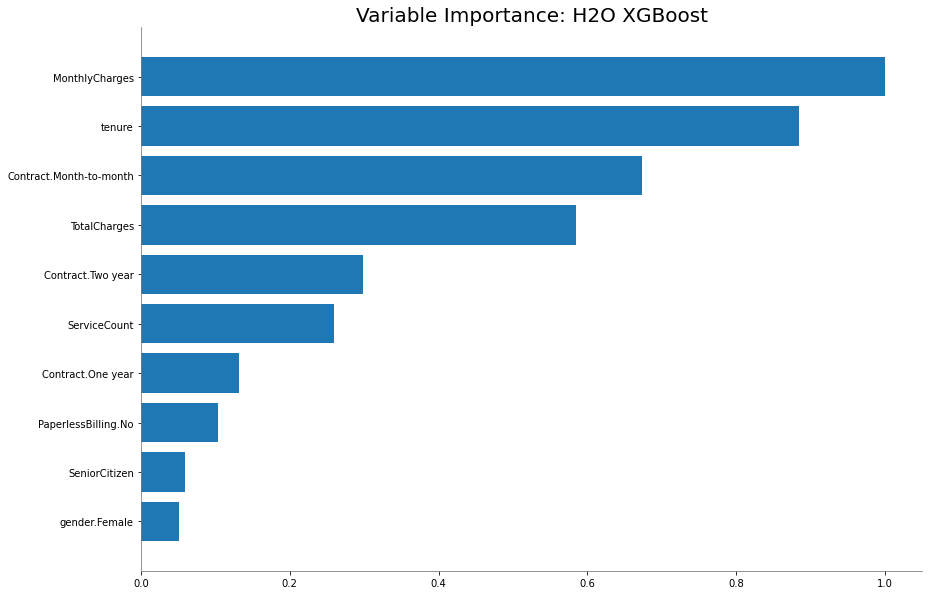

In [19]:
xgb_model.varimp_plot()